#  AIRPASSENGER SATISFACTION (CLASSIFICATION)

 

In [1]:
import pandas as pd
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\anmol\\OneDrive\\Desktop\\E-Learning\\M.L\\M.L Final'

In [3]:
df=pd.read_excel('Airpassenger11.xlsx')
df

,Unnamed,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,NaN,5047,Male,disloyal Customer,25,Business travel,Business,235,3,5.0,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,NaN,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2.0,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,NaN,24026,Female,Loyal Customer,25,Business travel,Business,562,2,2.0,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,NaN,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3.0,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,NaN,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,NaN,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,NaN,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,NaN,14057,Female,Loyal Customer,39,Business travel,Business,319,4,NaN,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,NaN,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,NaN,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [4]:
air=pd.DataFrame(df)
air

,Unnamed,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,NaN,5047,Male,disloyal Customer,25,Business travel,Business,235,3,5.0,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,NaN,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2.0,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,NaN,24026,Female,Loyal Customer,25,Business travel,Business,562,2,2.0,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,NaN,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3.0,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,NaN,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,NaN,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,NaN,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,NaN,14057,Female,Loyal Customer,39,Business travel,Business,319,4,NaN,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,NaN,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,NaN,...,4,4,3,4,5,4,5,1,11.0,satisfied


### Percentage of missing values in each column

In [5]:
total = air.isnull().sum().sort_values(ascending=False)
percent = (air.isnull().sum()/air.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Gate location,9890,0.9890
Unnamed,9853,0.9853
Departure/Arrival time convenient,9736,0.9736
Gender,69,0.0069
Arrival Delay in Minutes,26,0.0026
id,0,0.0000
Customer Type,0,0.0000
Age,0,0.0000
Type of Travel,0,0.0000
Class,0,0.0000


 Directly dropped all those variables who were having more than 20% of null values!!

In [6]:
air=air.drop(columns=['Gate location','Unnamed','Departure/Arrival time convenient'])

In [7]:
air=air.drop(columns=['id'])

### Imputing null values

In [8]:
air['Gender'] = air['Gender'].fillna(air['Gender'].mode()[0])

In [9]:
air['Arrival Delay in Minutes'].describe()


count    9974.000000
mean       15.242130
std        38.810195
min         0.000000
25%         0.000000
50%         0.000000
75%        13.000000
max      1280.000000
Name: Arrival Delay in Minutes, dtype: float64

In [10]:
air['Arrival Delay in Minutes'] = air['Arrival Delay in Minutes'].fillna(air['Arrival Delay in Minutes'].mean())

In [11]:
air.isnull().sum()

Gender                        0
Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Flight Distance               0
Inflight wifi service         0
Ease of Online booking        0
Food and drink                0
Online boarding               0
Seat comfort                  0
Inflight entertainment        0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

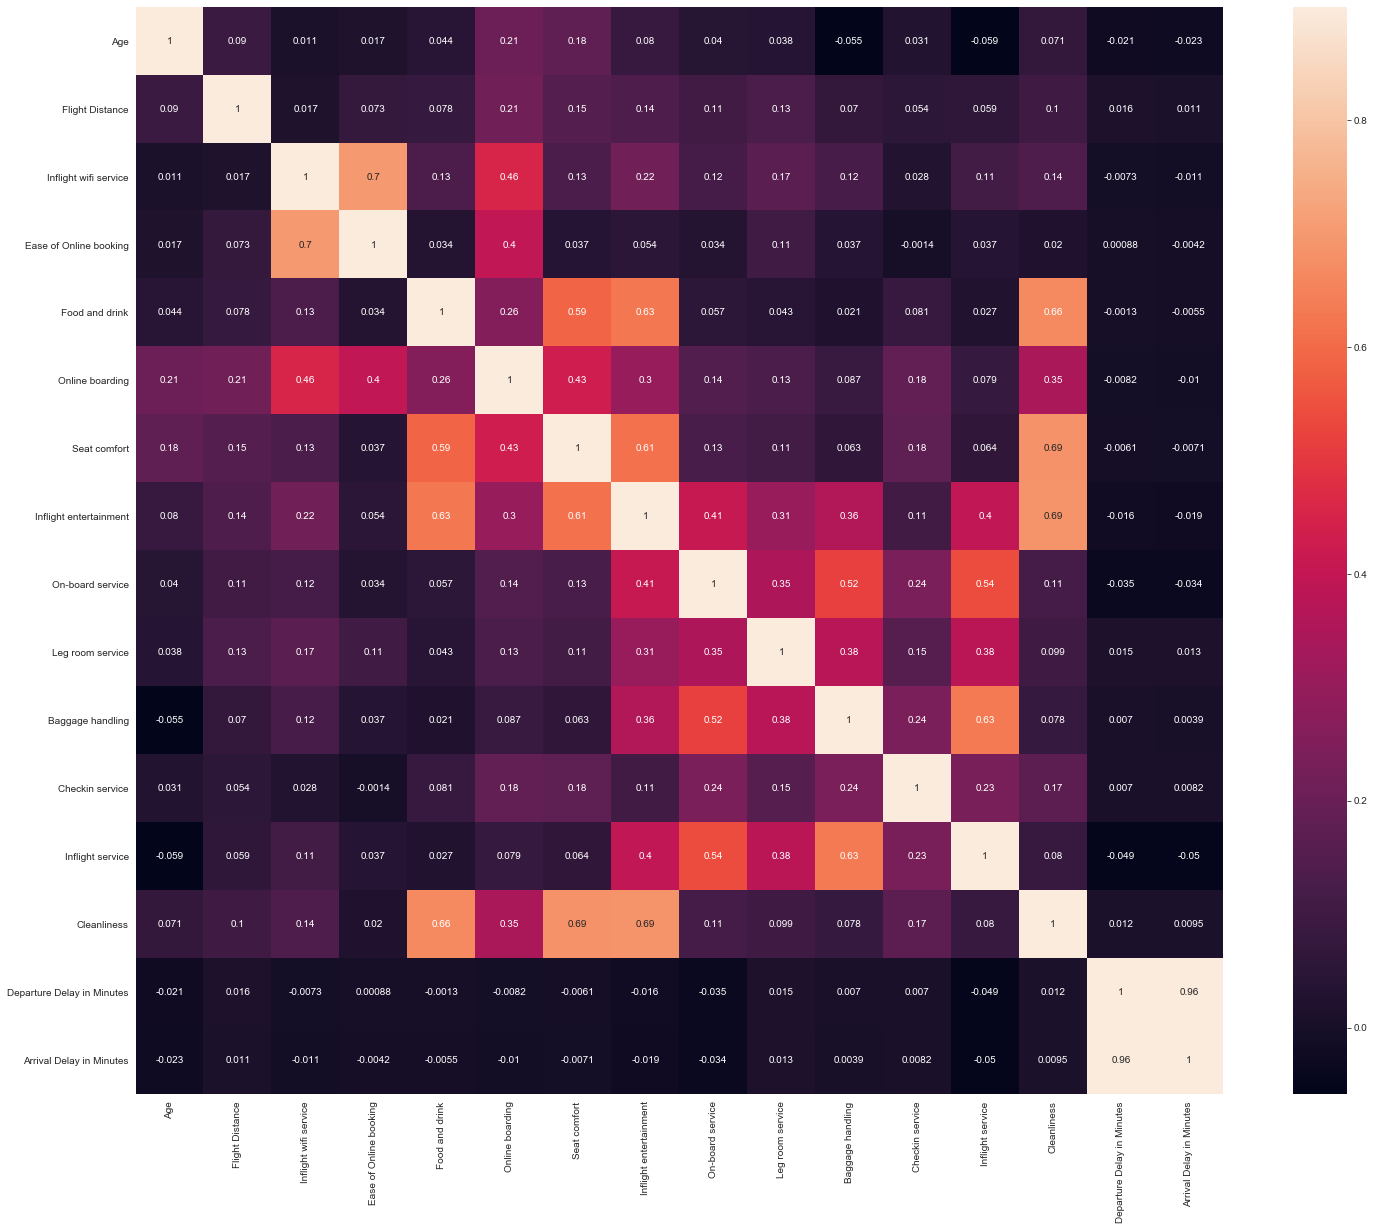

In [12]:
corr = air.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9,annot =True, square=True)

In [13]:
air['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [14]:
satiscation_map = {'neutral or dissatisfied': 0, 'satisfied': 1}
air['satisfaction'] = air['satisfaction'].map(satiscation_map)

## EDA

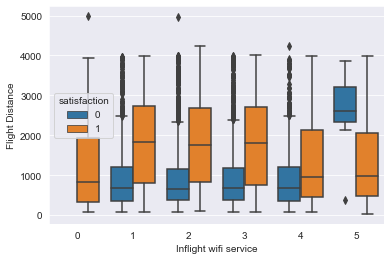

In [15]:
ax = sns.boxplot(x='Inflight wifi service',y="Flight Distance",hue='satisfaction', data=air)

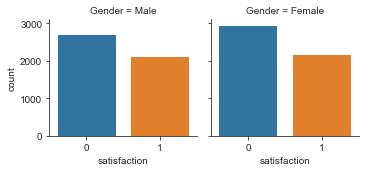

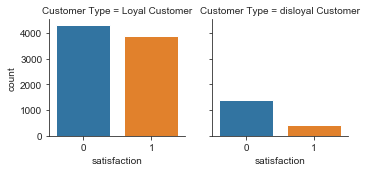

In [16]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=air, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=air, kind="count", height=2.5, aspect=1.0)

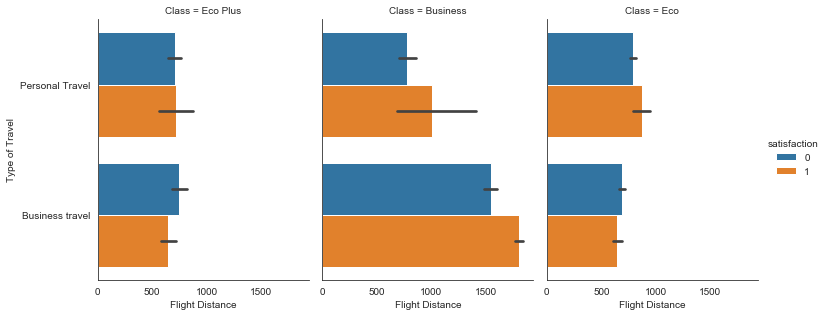

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=air, kind="bar", height=4.5, aspect=.8)

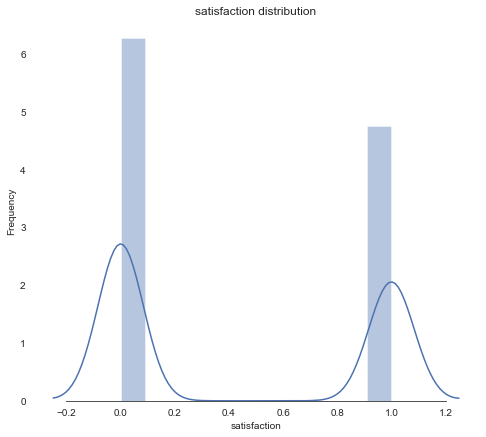

In [18]:
#Dependent Variable Analysis
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(air['satisfaction'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="satisfaction")
ax.set(title="satisfaction distribution")
sns.despine(trim=True, left=True)
plt.show()

In [19]:
air.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,1


In [20]:
air['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [21]:
air['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [22]:
air['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ('Customer Type','Type of Travel','Class','Gender')
#label encoding
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(air[c].values)) 
    air[c] = lbl.transform(list(air[c].values))


In [24]:
corr_matrix=air.corr()
corr_matrix["satisfaction"].sort_values(ascending=False)

satisfaction                  1.000000
Online boarding               0.497393
Inflight entertainment        0.412538
Seat comfort                  0.352683
Leg room service              0.327252
On-board service              0.324954
Cleanliness                   0.310574
Flight Distance               0.297468
Inflight wifi service         0.282101
Baggage handling              0.262615
Inflight service              0.253194
Food and drink                0.230136
Checkin service               0.218767
Ease of Online booking        0.161929
Age                           0.128828
Gender                        0.013107
Departure Delay in Minutes   -0.024030
Arrival Delay in Minutes     -0.029345
Customer Type                -0.187748
Class                        -0.440826
Type of Travel               -0.448325
Name: satisfaction, dtype: float64

In [25]:
air.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [26]:
X = air.loc[:, ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes']]
y = air.loc[:,['satisfaction']]

 SCALING: MinMaxScaler is used for scaling as the data is not normally distributed and doesn't have much outliers!

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 0)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org) 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Applying Voting Classifiers

In [29]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8743333333333333
KNeighborsClassifier 0.91
SVC 0.939
VotingClassifier 0.917


In [30]:

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8743333333333333
KNeighborsClassifier 0.91
SVC 0.939
VotingClassifier 0.92


## Two Models with Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier
lr_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [32]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.868


In [33]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
y_pred_tree = lr_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

Train score: 0.87
Test score: 0.87
0.8743333333333333


In [34]:
svc_clf = SVC(random_state=0)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print('Accuracy score" {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Accuracy score" 0.88
Train score: 0.88
Test score: 0.88


## Two models with Pasting

In [35]:
svc_clf = SVC(random_state=0)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print('Accuracy score {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Accuracy score 0.88
Train score: 0.88
Test score: 0.88


In [36]:
lr_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print('Accuracy score {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Accuracy score 0.87
Train score: 0.87
Test score: 0.87


## Two models with AdaBoost Boosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ada_clf = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.86
Test score: 0.86


In [39]:
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.92


## Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.939


## Deep Learning Model(Neural Network)

In [41]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [42]:

# create model
model = Sequential()
model.add(Dense(40, input_dim=19, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.15)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 5950 samples, validate on 1050 samples
Epoch 1/100
5950/5950 [==============================] - 1s 102us/step - loss: 0.4622 - accuracy: 0.7813 - val_loss: 0.3301 - val_accuracy: 0.8771
Epoch 2/100
5950/5950 [==============================] - 0s 67us/step - loss: 0.3116 - accuracy: 0.8771 - val_loss: 0.2873 - val_accuracy: 0.8867
Epoch 3/100
5950/5950 [==============================] - 0s 66us/step - loss: 0.2787 - accuracy: 0.8901 - val_loss: 0.2654 - val_accuracy: 0.8943
Epoch 4/100
5950/5950 [==============================] - 0s 60us/step - loss: 0.2557 - accuracy: 0.9025 - val_loss: 0.2406 - val_accuracy: 0.9133
Epoch 5/100
5950/5950 [==============================] - 0s 67us/step - loss: 0.2339 - accuracy: 0.9054 - val_loss: 0.2303 - val_accuracy: 0.9133
Epoch 6/100
5950/5950 [==============================] - 0s 63us/step - loss: 0.2178 - accuracy: 0.9114 - val_loss: 0.2580 - v

Epoch 53/100
5950/5950 [==============================] - 0s 63us/step - loss: 0.0989 - accuracy: 0.9597 - val_loss: 0.1427 - val_accuracy: 0.9410
Epoch 54/100
5950/5950 [==============================] - 0s 64us/step - loss: 0.1032 - accuracy: 0.9578 - val_loss: 0.1507 - val_accuracy: 0.9400
Epoch 55/100
5950/5950 [==============================] - 0s 66us/step - loss: 0.1005 - accuracy: 0.9576 - val_loss: 0.1402 - val_accuracy: 0.9410
Epoch 56/100
5950/5950 [==============================] - 0s 72us/step - loss: 0.0982 - accuracy: 0.9590 - val_loss: 0.1488 - val_accuracy: 0.9457
Epoch 57/100
5950/5950 [==============================] - 0s 71us/step - loss: 0.0962 - accuracy: 0.9598 - val_loss: 0.1509 - val_accuracy: 0.9429
Epoch 58/100
5950/5950 [==============================] - 1s 86us/step - loss: 0.0929 - accuracy: 0.9600 - val_loss: 0.1491 - val_accuracy: 0.9457
Epoch 59/100
5950/5950 [==============================] - 0s 77us/step - loss: 0.0955 - accuracy: 0.9573 - val_loss: 0

In [43]:
y_predict = model.predict_classes(X_test)
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Dimensionality Reduction using PCA

In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

In [45]:
pca=PCA(n_components=19)
X_Train=pca.fit_transform(X_train)
X_Test=pca.transform(X_test)
X_Train.shape

(7000, 19)

# KNN CLASSIFICATION

Text(0, 0.5, 'MSE')

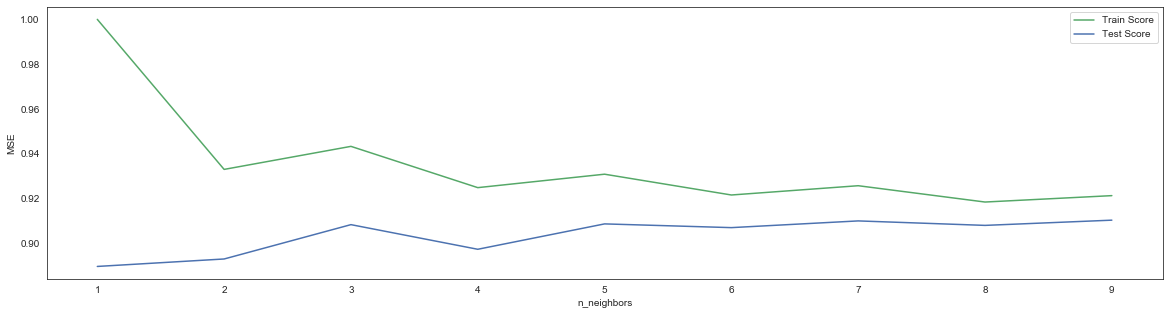

In [46]:

from sklearn.neighbors import KNeighborsClassifier
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_Train, y_train)
    train_score_array.append(knn.score(X_Train, y_train))
    test_score_array.append(knn.score(X_Test, y_test))
    
x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')



In [47]:

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_knn.fit(X_Train, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(X_Test)
print(model_knn.score(X_Test,y_test))

KNN: Best Parameters {'n_neighbors': 9}
0.9103333333333333


In [48]:
model_knn.best_score_

0.9065714285714286

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.90      0.96      0.93      1739
         one       0.93      0.85      0.89      1261

    accuracy                           0.91      3000
   macro avg       0.91      0.90      0.91      3000
weighted avg       0.91      0.91      0.91      3000



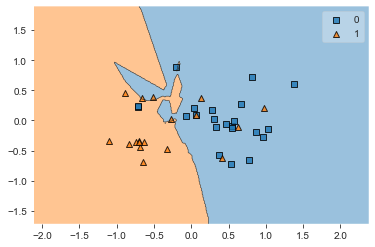

In [50]:
from mlxtend.plotting import plot_decision_regions

X_b = X_Train[10:50,[0,1]]
y_b = np.array(y_train[10:50]).flatten()

knn = KNeighborsClassifier(9)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_Train, y_train)
    log_l2.fit(X_Train, y_train)
    train_score_l1.append(log_l1.score(X_Train, y_train))
    train_score_l2.append(log_l2.score(X_Train, y_train))
    test_score_l1.append(log_l1.score(X_Test, y_test))
    test_score_l2.append(log_l2.score(X_Test, y_test))

In [52]:
print('Train_score_l1:',train_score_l1)
print('Test_score_l1:',test_score_l1)
print('Train_score_l2:',train_score_l2)
print('Test_score_l2:',test_score_l2)

Train_score_l1: [0.7988571428571428, 0.8458571428571429, 0.8717142857142857, 0.8732857142857143, 0.8738571428571429, 0.8737142857142857, 0.8737142857142857]
Test_score_l1: [0.7916666666666666, 0.849, 0.8713333333333333, 0.8733333333333333, 0.8743333333333333, 0.874, 0.874]
Train_score_l2: [0.8487142857142858, 0.864, 0.8734285714285714, 0.873, 0.8731428571428571, 0.8737142857142857, 0.8737142857142857]
Test_score_l2: [0.8526666666666667, 0.868, 0.8706666666666667, 0.8743333333333333, 0.8736666666666667, 0.874, 0.874]


In [53]:
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression()
param = { 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}
logistic = GridSearchCV(logit,param,cv=5, return_train_score=True)
logistic.fit(X_Train,y_train)

print('Logistic: Best Parameters',logistic.best_params_)


pred_log = logistic.predict(X_Test)
print(logistic.score(X_Test,y_test))

Logistic: Best Parameters {'C': 10, 'penalty': 'l2'}
0.8736666666666667


In [54]:
log=LogisticRegression(C=10, penalty='l2')
log.fit(X_Train,y_train)
print(log.score(X_Train,y_train))
print(log.score(X_Test,y_test))

0.8731428571428571
0.8736666666666667


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_log, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.89      0.90      0.89      1739
         one       0.85      0.84      0.85      1261

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



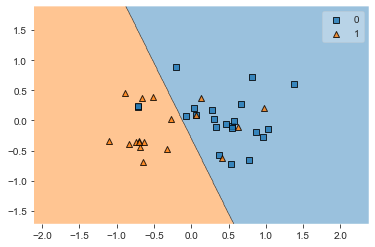

In [56]:
from mlxtend.plotting import plot_decision_regions

X_b = X_Train[10:50, [0,1]]
y_b = np.array(y_train[10:50]).flatten()

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

# DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(max_depth=1).fit(X_Train, y_train)
pred_t= tree.predict(X_Test)
print("Test score: {:.3f}".format(tree.score(X_Train, y_train)))
print("Train score: {:.3f}".format(tree.score(X_Test, y_test)))

Test score: 0.828
Train score: 0.826


In [58]:
print(classification_report(y_test, pred_t, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.82      0.89      0.86      1739
         one       0.83      0.74      0.78      1261

    accuracy                           0.83      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.83      0.83      0.82      3000



In [59]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
param = { 'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dtree = GridSearchCV(tree,param,cv=5, return_train_score=True)
dtree.fit(X_Train,y_train)

print('Decision: Best Parameters',dtree.best_params_)


pred_dt = dtree.predict(X_Test)
print(dtree.score(X_Test,y_test))

Decision: Best Parameters {'max_depth': 10}
0.899


In [60]:
tree= DecisionTreeClassifier(max_depth=9).fit(X_Train, y_train)
pred_tree=tree.predict(X_Test)
print(tree.score(X_Train,y_train))
print(tree.score(X_Test,y_test))

0.9477142857142857
0.905


In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_tree)

0.9017079829758048

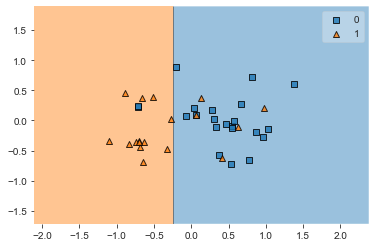

In [62]:
from mlxtend.plotting import plot_decision_regions

X_b = X_Train[10:50,[0,1]]
y_b = np.array(y_train[10:50]).flatten()

dtree= DecisionTreeClassifier(max_depth=2)
dtree.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = dtree)

# Linear Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC, SVC
linsvc = LinearSVC()
linsvc.fit(X_Train,y_train)
pred=linsvc.predict(X_Test)
print(linsvc.score(X_Test,y_test))

0.8703333333333333


In [64]:
from sklearn.svm import LinearSVC, SVC
linsvc = LinearSVC()
param = { 'C':[0.001,0.01,0.1,1,10,100,100]}
linear_svc= GridSearchCV(linsvc,param,cv=5, return_train_score=True)
linear_svc.fit(X_Train,y_train)

print('LinearSCV: Best Parameters',linear_svc.best_params_)


pred_svc = linear_svc.predict(X_Test)
print(linear_svc.score(X_Test,y_test))

LinearSCV: Best Parameters {'C': 10}
0.8713333333333333


In [65]:
svc=LinearSVC(C=10)
svc.fit(X_Train,y_train)
print(svc.score(X_Train,y_train))
print(svc.score(X_Test,y_test))

0.8741428571428571
0.8713333333333333


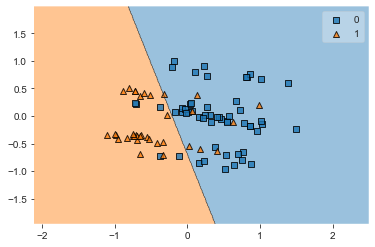

In [66]:
X_b = X_Train[10:100,[0,1]]
y_b = np.array(y_train[10:100]).flatten()

clf= LinearSVC(C=10)
clf.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = clf)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.88      0.90      0.89      1739
         one       0.85      0.84      0.85      1261

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



# SVC WITH KERNEL


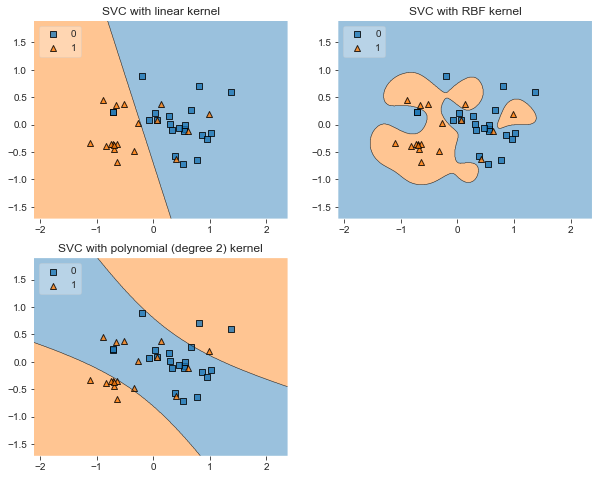

In [68]:
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions 
import itertools
C = 10
X_b = X_Train[10:50,[0,1]]
y_b = np.array(y_train[10:50]).flatten()

clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=10, C=C)
clf4 = SVC(kernel='poly', degree=2, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = [
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']

for clf, lab, grd in zip([ clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,clf=clf, legend=2)
    plt.title(lab)

In [69]:
svc_kernel=SVC()
param = { 'kernel':['linear','rbf','poly']}
svc= GridSearchCV(svc_kernel,param,cv=5, return_train_score=True)
svc.fit(X_Train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [70]:
svc.best_params_

{'kernel': 'rbf'}

In [71]:
svc.best_score_

0.9288571428571428

In [72]:
svc_lin=SVC(kernel='rbf')
param = { 'C':[0.01,0.1,1,10,100]}
svc= GridSearchCV(svc_lin,param,cv=5, return_train_score=True)
svc.fit(X_Train,y_train)
svc.best_params_
print('svc: Best Parameters',svc.best_params_)


pred_svc1 = svc.predict(X_Test)
print(svc.score(X_Test,y_test))

svc: Best Parameters {'C': 10}
0.9383333333333334


# SVC WITH RBF KERNEL

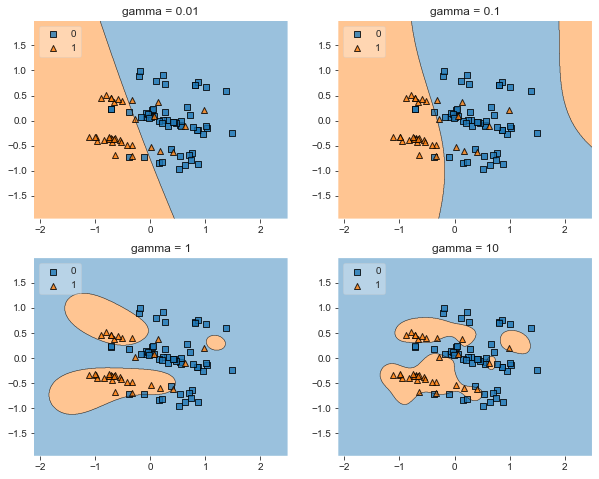

In [73]:
from matplotlib import gridspec
import itertools
C = 100
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)

X_b = X_Train[10:100,[0,1]]
y_b = np.array(y_train[10:100]).flatten()

models = (SVC(kernel='rbf', gamma=0.01, C=100),
         SVC(kernel = 'rbf', gamma = 0.1, C = 100),
         SVC(kernel = 'rbf', gamma = 1, C = 100),
         SVC(kernel = 'rbf', gamma = 10, C = 100))


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,
                                clf=clf, legend=2)
    plt.title(lab)

In [74]:
svc=SVC(kernel='rbf',gamma=1)
svc.fit(X_Train,y_train)
print(svc.score(X_Train,y_train))
pred_rbf_svc=svc.predict(X_Test)
print(svc.score(X_Test,y_test))

0.9535714285714286
0.932


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rbf_svc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.94      0.94      0.94      1739
         one       0.92      0.91      0.92      1261

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [76]:
Summary={'Algorithm':['KNN Classifier', 'Logistic Regression',
                      'Decision Tree','Linear SVC', 'SVC with Kernel',], 
         'Best Accuracy Obtained':[[0.908],[0.874],[0.928],[0.8724],[0.93],], 
         'Parameters':['K=7',['C=1','penalty=l1'],'max_depth=7','C=1',['kernel:rbf','gamma=0.1','C=100'],], 
         'Precision':[[0.89,0.93],[0.89,0.86],[0.86,0.71],[0.88,0.85],[0.91,0.92],],
         'Recall':[[0.95,0.84],[0.90,0.84],[0.75,0.82],[0.90,0.84],[0.95,0.86],],
         'F1-score':[[0.92,0.88],[0.89,0.85],[0.80,0.76],[0.89,0.85],[0.93,0.89]]}
Summary_table=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters',
                                             'Precision','Recall','F1-score'])

In [77]:
Summary_table

,Algorithm,Best Accuracy Obtained,Parameters,Precision,Recall,F1-score
0,KNN Classifier,[0.908],K=7,"[0.89, 0.93]","[0.95, 0.84]","[0.92, 0.88]"
1,Logistic Regression,[0.874],"[C=1, penalty=l1]","[0.89, 0.86]","[0.9, 0.84]","[0.89, 0.85]"
2,Decision Tree,[0.928],max_depth=7,"[0.86, 0.71]","[0.75, 0.82]","[0.8, 0.76]"
3,Linear SVC,[0.8724],C=1,"[0.88, 0.85]","[0.9, 0.84]","[0.89, 0.85]"
4,SVC with Kernel,[0.93],"[kernel:rbf, gamma=0.1, C=100]","[0.91, 0.92]","[0.95, 0.86]","[0.93, 0.89]"


According to the summary generated, we can predict the best model for our data depending upon the F1-score, Recall and best accuracy obtained.
Best accuracy is obtained by SVC with Kernel by giving maximum precison , recall and F-1 score and is the best model to go forward with.

## SUMMARY POST PCA

In [78]:
Summary={'Algorithm':['KNN Classifier', 'Logistic Regression',
                      'Decision Tree','Linear SVC', 'SVC with Kernel',], 
         'Best Accuracy Obtained':[[0.96],[0.873],[0.90],[0.87],[0.93],], 
         'Parameters':['K=9',['C=10','penalty=l2'],'max_depth=9','C=10',['kernel:rbf','gamma=1','C=10'],], 
         'Precision':[[0.9,0.93],[0.89,0.85],[0.82,0.83],[0.88,0.85],[0.94,0.92],],
         'Recall':[[0.96,0.85],[0.90,0.84],[0.89,0.74],[0.90,0.84],[0.94,0.91],],
         'F1-score':[[0.93,0.89],[0.89,0.85],[0.86,0.78],[0.89,0.85],[0.94,0.92]]}
Summary_table=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters',
                                             'Precision','Recall','F1-score'])

In [79]:
Summary_table

,Algorithm,Best Accuracy Obtained,Parameters,Precision,Recall,F1-score
0,KNN Classifier,[0.96],K=9,"[0.9, 0.93]","[0.96, 0.85]","[0.93, 0.89]"
1,Logistic Regression,[0.873],"[C=10, penalty=l2]","[0.89, 0.85]","[0.9, 0.84]","[0.89, 0.85]"
2,Decision Tree,[0.9],max_depth=9,"[0.82, 0.83]","[0.89, 0.74]","[0.86, 0.78]"
3,Linear SVC,[0.87],C=10,"[0.88, 0.85]","[0.9, 0.84]","[0.89, 0.85]"
4,SVC with Kernel,[0.93],"[kernel:rbf, gamma=1, C=10]","[0.94, 0.92]","[0.94, 0.91]","[0.94, 0.92]"


From the summary Table we can infer that there is not much difference in the accuracy after applying PCA. Almost all the Models have the same accuracy. KNN classifier can be considered as the model with the highest accuracy , precision and F1-score.